In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [12]:
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
d1 = df[['InvoiceNo', 'InvoiceDate']]
d1 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first')
d1 = d1.set_index(['InvoiceDate'])
d1.head()

,InvoiceNo
InvoiceDate,
2010-12-01 08:26:00,536365
2010-12-01 08:28:00,536366
2010-12-01 08:34:00,536367
2010-12-01 08:34:00,536368
2010-12-01 08:35:00,536369


In [10]:
d2 = d1['2011']
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.date).count()

KeyError: '2011'

In [ ]:
x = d3.index.get_level_values(0)
plt.plot(x, d3['InvoiceDate'])
plt.title('Number of Invoices in 2011 (Daily)', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()

Nhận xét:

Số lượng đơn hàng ngày có sự thay đổi mạnh.
Giữa tháng 10 và 11 có 1 ngày có số đơn tăng đột biến.
Tuy nhiên, biểu đồ này không thể hiện được việc thiếu dữ liệu trong 1 số ngày (do cách nhóm dữ liệu).

In [ ]:
# Lấy dữ liệu cần thiết cho mục tiêu 2
d4 = d2.groupby(by=d2['InvoiceDate'].dt.month).count()
print(d4)

In [ ]:
x = d4.index.get_level_values(0)
plt.bar(x, d4['InvoiceDate'])
plt.title('Number of Invoices in 2011 (monthly)', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()

Nhận xét:

3 tháng 9, 10, 11 có số lượng đơn hàng tăng đáng kể, trong đó tháng 11 có số đơn hàng cao nhất.
Tháng 12 có tổng số lượng đơn hàng thấp nhất.

In [ ]:
# Biểu đồ cột thể hiện số lượng đơn hàng theo từng tháng của năm 2011. (hình 1)
# Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011. (hình 2)
# Kết hợp trục: 
  # Trục 1: hình 1
  # Trục 2: hình 2

<BarContainer object of 12 artists>

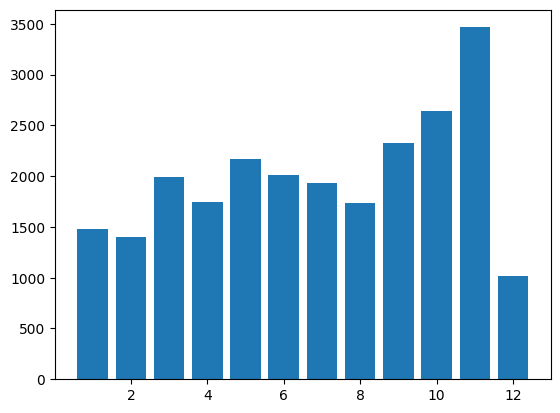

In [20]:
#Biểu đồ cột
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYear'] = df['InvoiceDate'].dt.year

# Lọc dữ liệu
df1 = df[df['InvoiceYear'] == 2011]
df2 = df1[['InvoiceNo', 'InvoiceYear', 'InvoiceDate']].drop_duplicates(keep='first')
df2['InvoiceMonth'] = df2['InvoiceDate'].dt.month
# Gom nhóm dữ liệu và đếm số lượng đơn hàng theo tháng
df3 = df2.groupby('InvoiceMonth')['InvoiceNo'].count().reset_index()
df3.columns = ['Month', 'Count']
plt.bar(df3['Month'], df3['Count'])

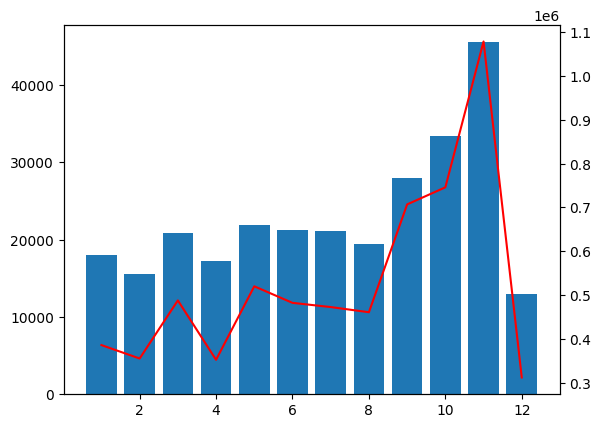

In [21]:
#Biểu đồ cột
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['Revenue'] = df['UnitPrice']*df['Quantity']

# Lọc dữ liệu
df1 = df[df['InvoiceYear'] == 2011]
df2 = df1[['InvoiceNo', 'Revenue', 'InvoiceYear', 'InvoiceDate']].drop_duplicates(keep='first')
df2['InvoiceMonth'] = df2['InvoiceDate'].dt.month

# Gom nhóm dữ liệu và đếm số lượng đơn hàng theo tháng
df3 = df2.groupby('InvoiceMonth')['InvoiceNo'].count().reset_index()
df3.columns = ['Month', 'Count']
plt.bar(df3['Month'], df3['Count'])

# Chỉ định trục 
axes1 = plt.gca()
axes2 = axes1.twinx()

# Vẽ biểu đồ đường thể hiện doanh thu theo tháng 
df4 = df2.groupby('InvoiceMonth')['Revenue'].sum().reset_index()
df4.columns = ['Month', 'Revenue']
axes2.plot(df4['Month'], df4['Revenue'], color='r')